# Capstone Project - The Battle of the Neighborhoods
## A Full Report
### By: Martin Foo

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# 1.0 Introduction
## 1.1 Background
   **Toronto** is the capital city of the Canadian province of Ontario. With a recorded population of approximately 2.7 million in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Toronto covers an area of 630 square kilometres (243 sq mi), with a maximum north–south distance of 21 km (13 mi). It has a maximum east–west distance of 43 km (27 mi) and it has a 46-kilometre (29 mi) long waterfront shoreline, on the northwestern shore of Lake Ontario. Toronto encompasses a geographical area formerly administered by many separate municipalities. These municipalities have each developed a distinct history and identity over the years, and their names remain in common use among Torontonians. Former municipalities include East York, Etobicoke, Forest Hill, Mimico, North York, Parkdale, Scarborough, Swansea, Weston and York. Throughout the city there exist hundreds of small neighbourhoods and some larger neighbourhoods covering a few square kilometres.

   **Penang** is a Malaysian state located on the northwest coast of Peninsular Malaysia, by the Malacca Strait. The state consists of Penang Island, Seberang Perai (a narrow strip of the Malay Peninsula) and a handful of smaller islets. Its capital city, George Town, is located at the northeastern tip of Penang Island. They are connected by Malaysia's two longest road bridges, the Penang Bridge and the Sultan Abdul Halim Muadzam Shah Bridge. Penang's population stood at nearly 1.767 million as of 2018, while its population density rose to 1,684/km2 (4,360/sq mi). It has among the nation's highest population densities and is one of the country's most urbanised states.With a total land area of just 1,048 km2 (405 sq mi), Penang is the second smallest state in Malaysia by land mass after Perlis. Penang, situated at the northwestern coastline of Peninsular Malaysia, lies between latitudes 5.59° and 5.12°N, and longitudes 100.17° and 100.56°E. The city of George Town includes the Bayan Lepas Free Industrial Zone, a high-tech manufacturing hub regarded as the "Silicon Valley of the East". The expansion of George Town has created suburbs to its northwest, west and south. The northwestern suburbs are somewhat more affluent, given their seafront locations which attract tourists and expatriates. The southern suburbs, such as Jelutong, grew due to industrial activities. On the other hand, Air Itam and Paya Terubong emerged to the west of George Town as a result of agricultural plantations on the central hills of Penang Island. Since the 1970s, massive industrialisation around Bayan Lepas, which created the Bayan Lepas Free Industrial Zone, led to the rapid urbanisation of the southeastern corner of Penang Island as well. The western half of the island, where Balik Pulau forms the main population centre, remains sparsely-populated, although urbanisation has encroached into the area in recent years.
   
## 1.2 Problem Statement
As both selected locations as stated in clause 1.1 are regarded as top spots of tourism in the world due to the compactness and richness of culture and livelihood as paracticed in the two locations, both reputations in the tourism field can be studied and compared. Hence, the following case study is conducted with the motive of **comparing the tourism characteristics of two major cities**, which are **Toronto, Ontario** and **Georgetown, Penang**. Such comparison study is prioritized to access the potentiality of both locations on tourism today and in the near future. The fields of comparison study includes food spots (restaurants, cafes etc.), galleries, museums and so much more. But, for this study, I will be using **restaurants**, **museums** and **galleries** for the comparison study. 
## 1.3 Scope of Study   
For the case of **Toronto, Ontario**, the area scope will be covering the **entire city**. And as for **Penang island**, the scope will only be covering the **North-East District of the island**, which covers approximately 10 sub-districts.

# 2.0 Data

The targeted datas of the two locations of interest, which are **Toronto, Ontario** and the **North-East District of the Penang island** selected for this study are listed as below, with the corresponding methods:
* The number of **restaurants** in **Toronto, Ontario** and the **North-East District of the Penang island**.
* The number of **museums** in **Toronto, Ontario** and the **North-East District of the Penang island**.
* The number of **galleries** in in **Toronto, Ontario** and the **North-East District of the Penang island**.

Firstly, the data sources that explain the postal codes and corresponding neighborhoods/ boroughs/ districts of the two locations of interest are extracted from 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' (Toronto, Ontario) and 'https://en.wikipedia.org/wiki/Northeast_Penang_Island_District' (North-East District of the Penang island). As follows, the geospatial datas of the corresponding postal codes, restaurants, museums and galleris of both locations are extracted as explained below:
* The coordinates of the postal codes based on the district/ borough/ neoghbourhood of both locations are extracted via 'http://cocl.us/Geospatial_data' (Toronto, Ontario) and **GeoPy's Geocoder** (North-East District of the Penang island).
* The geospatial data, numbers and other detials of the restaurants, museums and galleries of both location of interest are extracted via **Foursquare API**.


**Importing related packages and libraries for data extraction, manipulation and analysis.**

In [1]:
import numpy as np # library to handle data in a vectorized manner and computational calculations
import pandas as pd # library for data analsysis

!pip install folium # To install folium (if package is not installed)
import folium # To import folium

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
import requests # library to handle requests

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

     |████████████████████████████████| 93 kB 2.5 MB/s eta 0:00:011


## 2.1 Geospatial Data of Toronto, Ontario

In [2]:
wilipedia_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' # URL of Wikipedia for Canada postal codes list
df_list = pd.read_html(wilipedia_url) # To read HTML
canada_df = pd.DataFrame (df_list[0]) # To create dataframe from the HTML file

canada_df.drop(canada_df[canada_df['Borough'] == 'Not assigned'].index, inplace = True) # To remove rows with 'Not Assigned' in 'Borough'


canada_df_filtered = canada_df.reset_index(drop=True) #To reset dataframe index

canada_df_filtered # To display filtered dataframe

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
..          ...               ...   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence Manor, Lawrence Heights  
4          Queen's Park, Ontario Provincial Government  
..                                                 ...  
98       The Kingsway, Montgomery Road, Old Mill North  
99                                Church and Wellesley  
100  Business reply mail Processing Centre, South C...  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  
102  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

To extract the table format as above, I used the pandas library to read the HTML file from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M . After examining the HTML file, the table format was found in df_list[0], refering the code works above. The data cleaning process was done by removing rows of data with the 'Borough' feature having the attribute of 'Not assigned'. After reseting the index of the dataframe, the expected format of dataframe is displayed as above.

Here, I proceed to download the CSV file from http://cocl.us/Geospatial_data  for the coordinates data based on the postal codes displayed in the above dataframe.

In [3]:
!wget -q -O 'geo_data_csv' http://cocl.us/Geospatial_data #To download CSV file for Geospatial Data
print('Data downloaded!')

Data downloaded!


In [4]:
geo_data = pd.read_csv('geo_data_csv') # To read CSV data using pandas
geo_data

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
..          ...        ...        ...
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

[103 rows x 3 columns]

The coordinates data of the corresponding postal codes are then merged wuth the original dataframe.

In [5]:
geo_latlng = canada_df_filtered[canada_df_filtered['Postal Code'].isin(geo_data['Postal Code'].tolist())] # Filtering out the latitude and longitude by postal codes

geo_df = pd.merge(geo_latlng,geo_data) # Merging two dataframes together with the filtered values

geo_df # Displaying dataframe with additional info of latitude and longitude to the respectibe postal codes

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
..          ...               ...   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                            Regent Park, Harbourfront  43.654260 -79.360636  
3                     Lawrence Manor, Lawrence Heights  43.718518 -79.464763  
4          Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
..                                                 ...        ...        ...  
98       The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944  
99                                Church and Wellesley  43.665860 -79.383160  
100  Business reply mail Processing Centre, South C...  43.662744 -79.321558  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509  
102  Mimico NW, The Queensway West, South of Bloor,...  43.628841 -79.520999  

[103 rows x 5 columns]

The compiled dataframe of **Toronto, Ontario** with the neighborhood, borough and postal codes is then visualised as below:

In [6]:
# create map of Toronto latitude and longitude values
map_Toronto = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(geo_df['Latitude'], geo_df['Longitude'], geo_df['Borough'], geo_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto #To display Map of Toronto with markers of Neighbourhood and Borough

Since geocoder is unreliable and does not provide any geospatial data, the latitude and longitude values of each postal codes in the dataframe above are found and paired through the CSV as available on 'http://cocl.us/Geospatial_data'. The latitude and longitude values in the merged dataframe, along with the postal codes, boroughs and neighbourhoods are then applied as a reference data to add markers in the map of Toronto, Ontario generated by folium. An evenly-separated segmentation and clustering via markers can be observed on the map of Toronto as the geospatial data are based on the postal codes provided in the CSV file.

## 2.2 Geospatial Data of North-West District of Penang Island, Malaysia
The district and postal codes of the **North-West District of Penang Island, Malaysia** are sourced from https://en.wikipedia.org/wiki/Northeast_Penang_Island_District

In [7]:
#To conduct a case study on the north west district of Penang Island

#Selected information of North-West Penang Island Districts and their corresponding postal codes
penang_district_north_west = [[['Georgetown'],[10000]],[['Batu Ferringhi'],[11100]],[['Tanjung Bungah'],[11200]],[['Tanjung Tokong'],[10470]], \
                              [['Pulau Tikus'],[10250, 10350, 10400]],[['Batu Lanchang'],[11600]], \
                              [['Air Itam'],[11500]],[['Paya Terubong'],[11060]],[['Jelutong'],[11600]],[['Gelugor'],[11700]]]

district_list =[]
postal_code_list=[]

for dist in penang_district_north_west:
    for dist_name in dist[0]:
        for post_code in dist[1]:
            district_list.append(dist_name)
            postal_code_list.append(post_code)
     
penang_df=pd.DataFrame({'District':district_list,'Postal Code':postal_code_list}) #To create Dataframe with districts and postal code information

penang_df #Displaying the resulted dataframe

District  Postal Code
0       Georgetown        10000
1   Batu Ferringhi        11100
2   Tanjung Bungah        11200
3   Tanjung Tokong        10470
4      Pulau Tikus        10250
5      Pulau Tikus        10350
6      Pulau Tikus        10400
7    Batu Lanchang        11600
8         Air Itam        11500
9    Paya Terubong        11060
10        Jelutong        11600
11         Gelugor        11700

From here, I applied **GeoPy's Geocoder** to extract the coordinates data of the corresponding postal codes and districts, and merge the data to the original dataframe.

In [8]:
geolocator = Nominatim(user_agent="foursquare_agent")

lat_list =[] #To create a list to store latitude values
lng_list=[] #To create a list to store longitude values

#To obtain geospatial data for the corresponding districts and postal codes
for pc, d in zip(penang_df['Postal Code'],penang_df['District']):
   
    location = geolocator.geocode('{},{}'.format(pc,d))
    latitude = location.latitude
    longitude = location.longitude
    lat_list.append(latitude)
    lng_list.append(longitude)

penang_df['Latitude']=lat_list
penang_df['Longitude']=lng_list

penang_df # To display dataframe with geospatial data

District  Postal Code  Latitude   Longitude
0       Georgetown        10000  5.414568  100.329803
1   Batu Ferringhi        11100  5.478218  100.268761
2   Tanjung Bungah        11200  5.462163  100.286995
3   Tanjung Tokong        10470  5.446139  100.305254
4      Pulau Tikus        10250  5.431822  100.311768
5      Pulau Tikus        10350  5.476292  100.297370
6      Pulau Tikus        10400  5.476292  100.297370
7    Batu Lanchang        11600  5.390322  100.306109
8         Air Itam        11500  5.388131  100.278691
9    Paya Terubong        11060  5.371803  100.276162
10        Jelutong        11600  5.387346  100.314559
11         Gelugor        11700  5.367514  100.312132

The compiled dataframe of **North-West District of Penang Island** with the districts and postal codes is then visualised as below:

In [9]:
# create map of North-West District of Penang Island (Georgetown) latitude and longitude values
map_Penang = folium.Map(location=[5.4145, 100.329194], zoom_start=13)

# add markers to map
for lat, lng, district, postalcode in zip(penang_df['Latitude'], penang_df['Longitude'], penang_df['District'], penang_df['Postal Code']):
    label = '{}, {}'.format(postalcode, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Penang)  
    
map_Penang #To display Map of Penang island with markers of District and Postal Codes

## 2.3 To find the Geospatial Data of Restaurants, Galleries and Museums  (Foursquare API)

The credentials to call for the **Foursquare API** are stated below:

In [10]:
CLIENT_ID = 'BGC0PZQOVF2BA041GXVNCY04NFBDGGZWFBHHF00L13ROBSZ2' # your Foursquare ID
CLIENT_SECRET = 'Y0VLSA0WCJ1XNE52SIXH2ZCBUNOP03GAS3ZXGSUHJUKSOPJB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BGC0PZQOVF2BA041GXVNCY04NFBDGGZWFBHHF00L13ROBSZ2
CLIENT_SECRET:Y0VLSA0WCJ1XNE52SIXH2ZCBUNOP03GAS3ZXGSUHJUKSOPJB


### 2.3.1 To find statistical patterns of restaurants, galleries and museums in the city of Tonto, Ontario

#### 2.3.1.1 Geospatial Data of Restaurants in Toronto, Ontario
By using the **'search' query**, I am able to explore the geospatial data of nearby retaurants, galleries and museums of ""Toronto, Ontario"", with a **default radius of 2000 m**. The defined function to explore nearby spots and obtain the corresponding geospatial data via **Foursquare API** is explained as below:

In [11]:
#Defining a function to search nearby venues as specified via search-query

def getNearbyVenues(names, latitudes, longitudes, radius, search):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search, radius, LIMIT)
            
        # make the GET request
        results_1 = requests.get(url).json()["response"]['venues']
   
        for r,n,la,lo in zip(results_1,names,latitudes,longitudes):
        
              venues_list.append([(n,la,lo,r['name'],r['location']['lat'],r['location']['lng'])])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)   

In [12]:
df_toronto_res = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Restaurant') #Call function for restaurants geospatial data

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [70]:
#To remove duplicates
df_toronto_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Toronto, Ontario.'.format(len(df_toronto_res['Venue'].unique())))
df_toronto_res.head()

There are a total of 986 registered restaurants throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
2  Downtown Toronto              43.654260              -79.360636   
3        North York              43.718518              -79.464763   
4  Downtown Toronto              43.662301              -79.389494   
5         Etobicoke              43.667856              -79.532242   
6       Scarborough              43.806686              -79.194353   

                             Venue  Venue Latitude  Venue Longitude  
2  Valley Fields Family Restaurant       43.741452       -79.319633  
3               Darband Restaurant       43.755194       -79.348498  
4            Hakka No.1 Restaurant       43.756800       -79.312850  
5              The Mill Restaurant       43.740700       -79.322400  
6                Karibu Restaurant       43.759216       -79.311051

Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of restaurants is visualized as below:

In [14]:
map_toronto_res = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_res['Venue Latitude'], df_toronto_res['Venue Longitude'], df_toronto_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_res)  
    
map_toronto_res #Display map

#### 2.3.1.2 Geospatial Data of Galleries in Toronto, Ontario

In [15]:
df_toronto_gal = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Gallery')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [71]:
#To remove duplicates
df_toronto_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Toronto, Ontario.'.format(len(df_toronto_gal['Venue'].unique())))
df_toronto_gal.head()

There are a total of 398 registered galleries throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        North York              43.753259              -79.329656   
2        North York              43.725882              -79.315572   
3  Downtown Toronto              43.654260              -79.360636   
4        North York              43.718518              -79.464763   
5  Downtown Toronto              43.662301              -79.389494   

                    Venue  Venue Latitude  Venue Longitude  
0  Sandra Ainsley Gallery       43.719044       -79.308892  
2           Rouge gallery       43.659070       -79.349182  
3           Bottē Gallery       43.654110       -79.360976  
4       Jane Roos Gallery       43.653962       -79.361090  
5          Austin Gallery       43.648814       -79.378071

Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of galleries is visualized as below:

In [17]:
map_toronto_gal = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_gal['Venue Latitude'], df_toronto_gal['Venue Longitude'], df_toronto_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_gal)  
    
map_toronto_gal

#### 2.3.1.3 Geospatial Data of Museums in Toronto, Ontario

In [18]:
df_toronto_meu = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Museum')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [72]:
#To remove duplicates
df_toronto_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Toronto, Ontario.'.format(len(df_toronto_meu['Venue'].unique())))
df_toronto_meu.head()

There are a total of 35 registered museums throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
2        North York              43.753259              -79.329656   
3        North York              43.725882              -79.315572   
4  Downtown Toronto              43.654260              -79.360636   
5        North York              43.718518              -79.464763   
6  Downtown Toronto              43.662301              -79.389494   

                            Venue  Venue Latitude  Venue Longitude  
2             Museum Of Illusions       43.650219       -79.369451  
3  Museum Of The End Of The World       43.654061       -79.385452  
4           Riverdale Farm Museum       43.667602       -79.360132  
5  Cabbagetown Regent Park Museum       43.667732       -79.359980  
6            Friar’s Music Museum       43.655662       -79.380426

Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of museums is visualized as below:

In [20]:
map_toronto_meu = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_meu['Venue Latitude'], df_toronto_meu['Venue Longitude'], df_toronto_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_meu)  
    
map_toronto_meu

### 2.3.2 To find statistical patterns of restaurants, galleries and museums in the North-West District of Penang, Malaysia

#### 2.3.2.1 Geospatial Data of Restaurants in  North-West District of Penang, Malaysia

In [21]:
df_penang_res = getNearbyVenues(names=penang_df['District'], latitudes=penang_df['Latitude'], longitudes=penang_df['Longitude'],radius=2500, search='Restaurant') #Call function for restaurants geospatial data

Georgetown
Batu Ferringhi
Tanjung Bungah
Tanjung Tokong
Pulau Tikus
Pulau Tikus
Pulau Tikus
Batu Lanchang
Air Itam
Paya Terubong
Jelutong
Gelugor


In [73]:
#To remove duplicates
df_penang_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout North-West District of Penang, Malaysia.'.format(len(df_penang_res['Venue'].unique())))
df_penang_res.head()

There are a total of 72 registered restaurants throughout North-West District of Penang, Malaysia.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Georgetown               5.414568              100.329803   
1  Batu Ferringhi               5.478218              100.268761   
2  Tanjung Bungah               5.462163              100.286995   
3  Tanjung Tokong               5.446139              100.305254   
4     Pulau Tikus               5.431822              100.311768   

                                               Venue  Venue Latitude  \
0                              Hameediyah Restaurant        5.418519   
1  Kimberly Restaurant (汕头街权记鸭粥粿汁专卖店) (Restoran K...        5.416286   
2                                 Kapitan Restaurant        5.416220   
3              Guo Guo Le Steamboat Restaurant (锅锅乐)        5.414798   
4                          Tek Sen Restaurant (德盛飯店)        5.417387   

   Venue Longitude  
0       100.332556  
1       100.332799  
2       100.338714  
3       100.330769  
4       100.335982

Due to the fact that the radius settings for the search query via Foursquare API was set at **2500 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.


The geospatial data of restaurants is visualized as below:

In [23]:
map_penang_res = folium.Map(location=[5.4145, 100.329194], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_penang_res['Venue Latitude'], df_penang_res['Venue Longitude'], df_penang_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_penang_res)  
    
map_penang_res #Display map

#### 2.3.2.2 Geospatial Data of Galleries in  North-West District of Penang, Malaysia

In [24]:
df_penang_gal = getNearbyVenues(names=penang_df['District'], latitudes=penang_df['Latitude'], longitudes=penang_df['Longitude'],radius=2500, search='Gallery') #Call function for galleries geospatial data

Georgetown
Batu Ferringhi
Tanjung Bungah
Tanjung Tokong
Pulau Tikus
Pulau Tikus
Pulau Tikus
Batu Lanchang
Air Itam
Paya Terubong
Jelutong
Gelugor


In [74]:
#To remove duplicates
df_penang_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout North-West District of Penang, Malaysia.'.format(len(df_penang_gal['Venue'].unique())))
df_penang_gal.head()

There are a total of 51 registered galleries throughout North-West District of Penang, Malaysia.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Georgetown               5.414568              100.329803   
1  Batu Ferringhi               5.478218              100.268761   
2  Tanjung Bungah               5.462163              100.286995   
3  Tanjung Tokong               5.446139              100.305254   
4     Pulau Tikus               5.431822              100.311768   

                               Venue  Venue Latitude  Venue Longitude  
0                     Tomnic Gallery        5.412844       100.331163  
1                Food Gallery (食代广场)        5.411952       100.326028  
2           Tongkat Ali King Gallery        5.414604       100.329768  
3      World Buddhist Stamps Gallery        5.414942       100.322103  
4  Penang State Museum & Art Gallery        5.421268       100.339404

Due to the fact that the radius settings for the search query via Foursquare API was set at **2500 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of galleries is visualized as below:

In [26]:
map_penang_gal = folium.Map(location=[5.4145, 100.329194], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_penang_gal['Venue Latitude'], df_penang_gal['Venue Longitude'], df_penang_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_penang_gal)  
    
map_penang_gal #Display map

#### 2.3.2.3 Geospatial Data of Museums in  North-West District of Penang, Malaysia

In [27]:
df_penang_meu = getNearbyVenues(names=penang_df['District'], latitudes=penang_df['Latitude'], longitudes=penang_df['Longitude'],radius=2500, search='Museum') #Call function for museums geospatial data

Georgetown
Batu Ferringhi
Tanjung Bungah
Tanjung Tokong
Pulau Tikus
Pulau Tikus
Pulau Tikus
Batu Lanchang
Air Itam
Paya Terubong
Jelutong
Gelugor


In [75]:
#To remove duplicates
df_penang_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout North-West District of Penang, Malaysia.'.format(len(df_penang_meu['Venue'].unique())))
df_penang_meu.head()

There are a total of 22 registered museums throughout North-West District of Penang, Malaysia.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Georgetown               5.414568              100.329803   
1  Batu Ferringhi               5.478218              100.268761   
3  Tanjung Tokong               5.446139              100.305254   
4     Pulau Tikus               5.431822              100.311768   
6     Pulau Tikus               5.476292              100.297370   

                                        Venue  Venue Latitude  Venue Longitude  
0                                Ghost Museum        5.413839       100.334855  
1          Asia Comic Cultural Museum 亚洲漫画文化馆        5.414315       100.330464  
3                          Asia Camera Museum        5.417695       100.329340  
4                         Glass Museum Penang        5.417439       100.329198  
6  Penang Museum (Muzium Negeri Pulau Pinang)        5.420487       100.338849

Due to the fact that the radius settings for the search query via Foursquare API was set at **2500 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of museums is visualized as below:

In [29]:
map_penang_meu = folium.Map(location=[5.4145, 100.329194], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_penang_meu['Venue Latitude'], df_penang_meu['Venue Longitude'], df_penang_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_penang_meu)  
    
map_penang_meu #Display map

# 3.0 Methodology

In **Section 2.0**, the relevant datas comprises of the number of restaurants, galleries and museums in both location of interest (**Toronto, Ontario** & **North-West District of Penang, Malaysia**) are collected using the search query function avialable in **Foursquare API**, with the respective baseline input search queries of 'Restaurant', 'Gallery' and 'Museum' and radius settings of **2000m** for Toronto, Ontario and **2500m** for North-West District of Penang, Malaysia. The radius settings are selected based on the distribution of districts or borough in both location of interests. For example, since there is significantly higher number of distinctive postal codes and boroughs in Toronto, Ontario, than the districts and postal codes on North-West District of Penang, Malaysia, the radius of search for Toronto, Ontario is set to be lower than that of Penang, Malaysia.

In this following section, the data gathered from the previous section will be used to do **exploratory data analysis**, we will be looking into the data comparisons of both locations via **data visualisation** as explained below:
* Total Number of Restaurants, Museums and Galleries in both location.
* Distribution of Restaurants, Museums and Galleries in both location according to districts / boroughs.
* Total Number of Restaurants, Museums and Galleries per district / borough in both location.

Then, the potentiality study of both locations on tourism will be accessed based on the analyzed data.

# 4.0 Analysis

## 4.1 Study on the total number of Restaurants, Galleries and Museums in both Location

Here, the study on the total number of restaurants, galleries and museums are aggregated in the form of dataframes for comprehension. 

In [79]:
# To construct a dataframe to compare total number of restaurants, galleries and museums for both locations
df_total_compiled = pd.DataFrame(np.array([['Restaurants',len(df_toronto_res['Venue'].unique()),len(df_penang_res['Venue'].unique())],
                                           ['Galleries',len(df_toronto_gal['Venue'].unique()),len(df_penang_gal['Venue'].unique())],
                                           ['Museums',len(df_toronto_meu['Venue'].unique()),len(df_penang_meu['Venue'].unique())],
                                           ['Total',len(df_toronto_meu['Venue'].unique())+len(df_toronto_res['Venue'].unique())+len(df_toronto_gal['Venue'].unique()),len(df_penang_meu['Venue'].unique())+len(df_penang_gal['Venue'].unique())+len(df_penang_res['Venue'].unique())]]
                                         ),
                                           columns=['Buildings','Toronto, Ontario','NW District of Penang'])

df_total_compiled_2 = df_total_compiled.set_index('Buildings')
df_total_compiled_f = df_total_compiled_2[['Toronto, Ontario','NW District of Penang']].astype('int64')

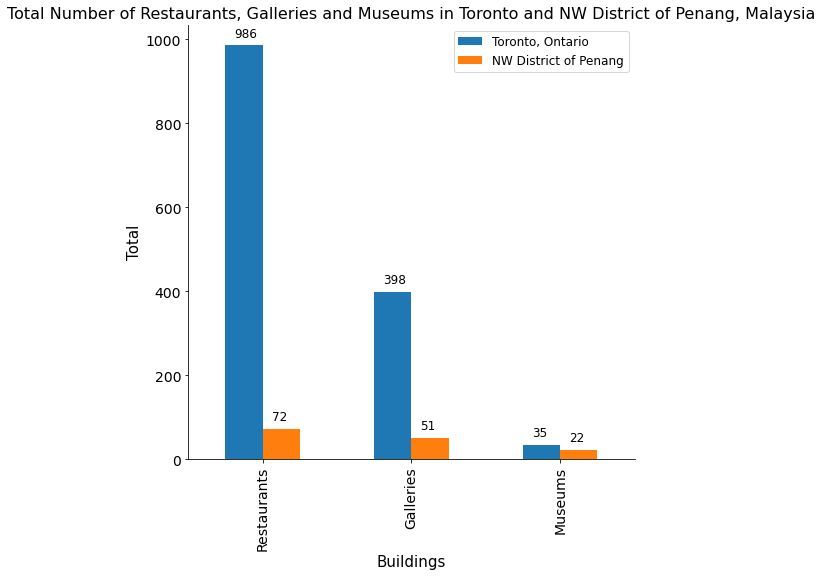

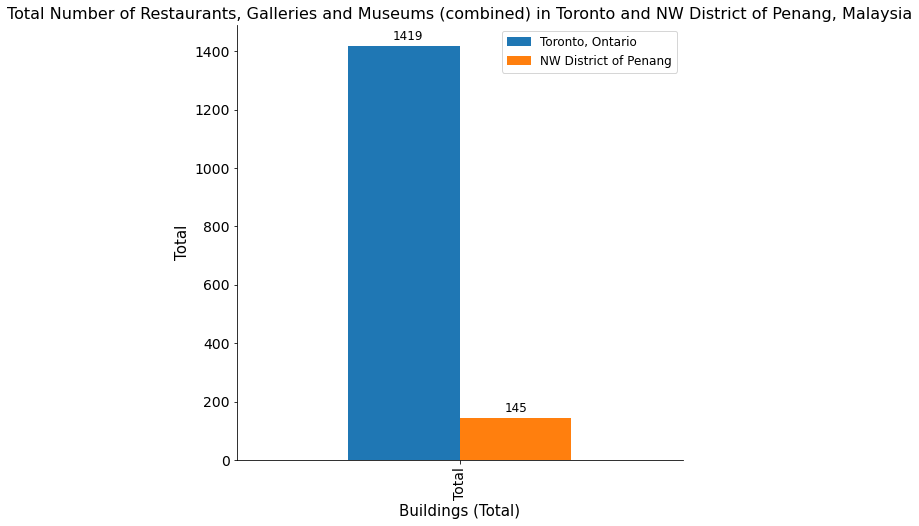

In [80]:
#Set bar chart

ax = df_total_compiled_f.loc[['Restaurants','Galleries','Museums']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)
ax_total = df_total_compiled_f.loc[['Total']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)

#Set bar chart title
ax.set_title('Total Number of Restaurants, Galleries and Museums in Toronto and NW District of Penang, Malaysia',fontsize = 16)
ax_total.set_title('Total Number of Restaurants, Galleries and Museums (combined) in Toronto and NW District of Penang, Malaysia',fontsize = 16)

# add labels to axes
ax.set_xlabel('Buildings', fontsize=15)
ax.set_ylabel('Total', fontsize=15)

ax_total.set_xlabel('Buildings (Total)', fontsize=15)
ax_total.set_ylabel('Total', fontsize=15)

#add legends
ax.legend(fontsize=12)
ax_total.legend(fontsize=12)

#Removing borders of left, right and top
borders = ["top","right"]

for b in borders:
    ax.spines[b].set_visible(False)
    ax_total.spines[b].set_visible(False)

    
# set individual bar labels in the bar chart
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.06, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')
for i in ax_total.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_total.text(i.get_x()+0.10, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')


## 4.1 Study on the Distributions of Restaurants, Galleries and Museums in both Location (District/ Borough)

Here, the study on the distributions of restaurants, galleries and museums based on districts/ boroughs are aggregated in the form of dataframes for comprehension. 

### 4.1.2 Toronto, Ontario 

In [115]:
df_toronto_group_res = df_toronto_res.groupby('Neighborhood').count()

df_toronto_group_res["Venue"]= round(df_toronto_group_res["Venue"]/df_toronto_group_res["Venue"].sum(),3)*100

df_toronto_final_res = df_toronto_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_toronto_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Restaurants (%)
Neighborhood                                     
Downtown Toronto                             23.3
East Toronto                                  4.9
East York                                    10.4
Etobicoke                                     8.6
North York                                   28.5
Scarborough                                  16.1
West Toronto                                  3.6
York                                          4.6

In [112]:
df_toronto_group_gal = df_toronto_gal.groupby('Neighborhood').count()

df_toronto_group_gal["Venue"]= round(df_toronto_group_gal["Venue"]/df_toronto_group_gal["Venue"].sum(),3)*100

df_toronto_final_gal = df_toronto_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_toronto_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Galleries (%)
Neighborhood                                   
Downtown Toronto                           22.8
East Toronto                                5.1
East York                                   9.8
Etobicoke                                   6.5
North York                                 31.3
Scarborough                                15.8
West Toronto                                5.3
York                                        3.5

In [137]:
df_toronto_group_meu = df_toronto_meu.groupby('Neighborhood').count()

df_toronto_group_meu["Venue"]= round(df_toronto_group_meu["Venue"]/df_toronto_group_meu["Venue"].sum(),3)*100

df_toronto_final_meu = df_toronto_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_toronto_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Museums (%)
Neighborhood                                 
Downtown Toronto                         27.2
East Toronto                              2.0
East York                                10.4
Etobicoke                                13.4
North York                               24.3
Scarborough                              15.3
West Toronto                              1.0
York                                      6.4

Now, we merge the distribution datas of Restaurants, Museums and Galleries of Toronto, Ontario into a single dataframe as compilation.

In [184]:
#To create dummy dataframe to extract Neighborhood data for reference
ddf =  df_toronto_final_meu.reset_index()

#To create dataframe for compilation
df_dist_toronto = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
df_dist_toronto["Distribution of Restaurants (%)"]=np.array(df_toronto_final_res["Distribution of Restaurants (%)"])
df_dist_toronto["Distribution of Galleries (%)"]=np.array(df_toronto_final_gal["Distribution of Galleries (%)"])
df_dist_toronto["Distribution of Museums (%)"]=np.array(df_toronto_final_meu["Distribution of Museums (%)"])

#Displaying compiled datafram
df_dist_toronto

Distribution of Restaurants (%)  \
Neighborhood                                        
Downtown Toronto                             23.3   
East Toronto                                  4.9   
East York                                    10.4   
Etobicoke                                     8.6   
North York                                   28.5   
Scarborough                                  16.1   
West Toronto                                  3.6   
York                                          4.6   

                  Distribution of Galleries (%)  Distribution of Museums (%)  
Neighborhood                                                                  
Downtown Toronto                           22.8                         27.2  
East Toronto                                5.1                          2.0  
East York                                   9.8                         10.4  
Etobicoke                                   6.5                         13.4  
North York                                 31.3                         24.3  
Scarborough                                15.8                         15.3  
West Toronto                                5.3                          1.0  
York                                        3.5                          6.4

Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in Toronto, Ontario. 

(-1.168407635438941,
 1.1915686035304995,
 -1.1940290113489325,
 1.1824042056381117)

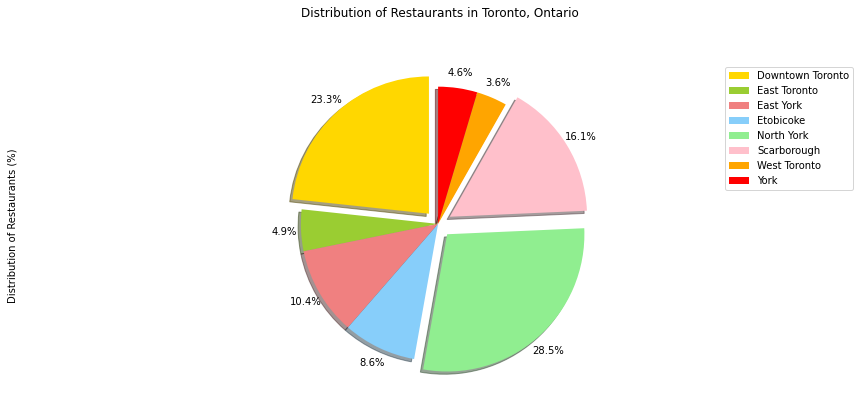

In [191]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_toronto.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in Toronto, Ontario', y=1.12) 
plt.axis('equal') 

(-1.162976149618816,
 1.193407301611628,
 -1.2028315462907904,
 1.1839627500715264)

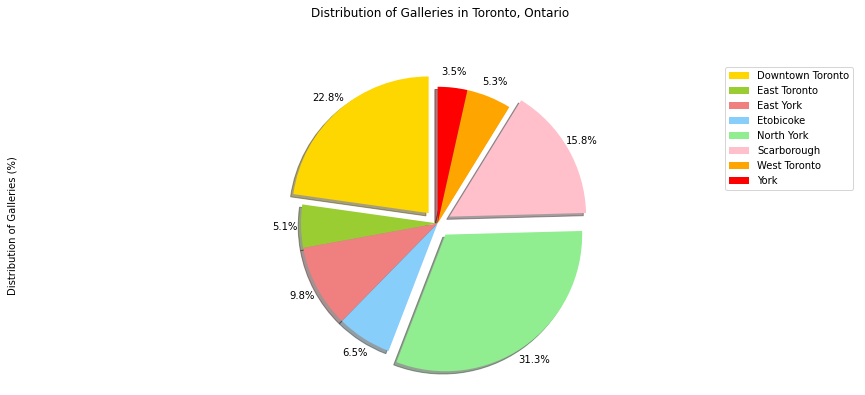

In [188]:
df_dist_toronto.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in Toronto, Ontario', y=1.12) 
plt.axis('equal') 

(-1.19526973906117, 1.2177982184201108, -1.145598641455764, 1.1709565346216086)

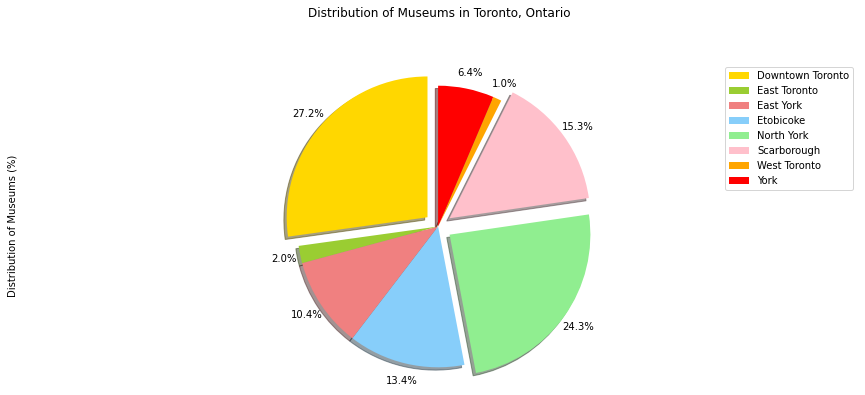

In [189]:
df_dist_toronto.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in Toronto, Ontario', y=1.12) 
plt.axis('equal') 

### 4.1.3 North-West District of Penang, Malaysia

In [197]:
df_penang_group_res = df_penang_res.groupby('Neighborhood').count()

df_penang_group_res["Venue"]= round(df_penang_group_res["Venue"]/df_penang_group_res["Venue"].sum(),3)*100

df_penang_final_res = df_penang_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_penang_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Restaurants (%)
Neighborhood                                   
Air Itam                                    6.0
Batu Ferringhi                              8.0
Batu Lanchang                               8.0
Gelugor                                    10.0
Georgetown                                  6.0
Jelutong                                    8.0
Paya Terubong                               8.0
Pulau Tikus                                28.0
Tanjung Bungah                              8.0
Tanjung Tokong                             10.0

In [198]:
df_penang_group_gal = df_penang_gal.groupby('Neighborhood').count()

df_penang_group_gal["Venue"]= round(df_penang_group_gal["Venue"]/df_penang_group_gal["Venue"].sum(),3)*100

df_penang_final_gal = df_penang_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_penang_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Galleries (%)
Neighborhood                                 
Air Itam                                  8.0
Batu Ferringhi                           12.0
Batu Lanchang                             4.0
Gelugor                                   8.0
Georgetown                                6.7
Jelutong                                  8.0
Paya Terubong                             8.0
Pulau Tikus                              25.3
Tanjung Bungah                           10.7
Tanjung Tokong                            9.3

In [199]:
df_penang_group_meu = df_penang_meu.groupby('Neighborhood').count()

df_penang_group_meu["Venue"]= round(df_penang_group_meu["Venue"]/df_penang_group_meu["Venue"].sum(),3)*100

df_penang_final_meu = df_penang_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_penang_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

Distribution of Museums (%)
Neighborhood                               
Air Itam                                5.9
Batu Ferringhi                         17.6
Batu Lanchang                           8.8
Gelugor                                 5.9
Georgetown                              2.9
Jelutong                                5.9
Paya Terubong                           5.9
Pulau Tikus                            23.5
Tanjung Bungah                         11.8
Tanjung Tokong                         11.8

In [200]:
#To create dummy dataframe to extract Neighborhood data for reference
ddp =  df_penang_final_meu.reset_index()

#To create dataframe for compilation
df_dist_penang = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
                              index=[ddp['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
df_dist_penang["Distribution of Restaurants (%)"]=np.array(df_penang_final_res["Distribution of Restaurants (%)"])
df_dist_penang["Distribution of Galleries (%)"]=np.array(df_penang_final_gal["Distribution of Galleries (%)"])
df_dist_penang["Distribution of Museums (%)"]=np.array(df_penang_final_meu["Distribution of Museums (%)"])

#Displaying compiled datafram
df_dist_penang

Distribution of Restaurants (%)  \
Neighborhood                                      
Air Itam                                    6.0   
Batu Ferringhi                              8.0   
Batu Lanchang                               8.0   
Gelugor                                    10.0   
Georgetown                                  6.0   
Jelutong                                    8.0   
Paya Terubong                               8.0   
Pulau Tikus                                28.0   
Tanjung Bungah                              8.0   
Tanjung Tokong                             10.0   

                Distribution of Galleries (%)  Distribution of Museums (%)  
Neighborhood                                                                
Air Itam                                  8.0                          5.9  
Batu Ferringhi                           12.0                         17.6  
Batu Lanchang                             4.0                          8.8  
Gelugor                                   8.0                          5.9  
Georgetown                                6.7                          2.9  
Jelutong                                  8.0                          5.9  
Paya Terubong                             8.0                          5.9  
Pulau Tikus                              25.3                         23.5  
Tanjung Bungah                           10.7                         11.8  
Tanjung Tokong                            9.3                         11.8

Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in North-West District of Penang. 

(-1.2142259997822287,
 1.2002307438666147,
 -1.1164744456178088,
 1.2004189879266232)

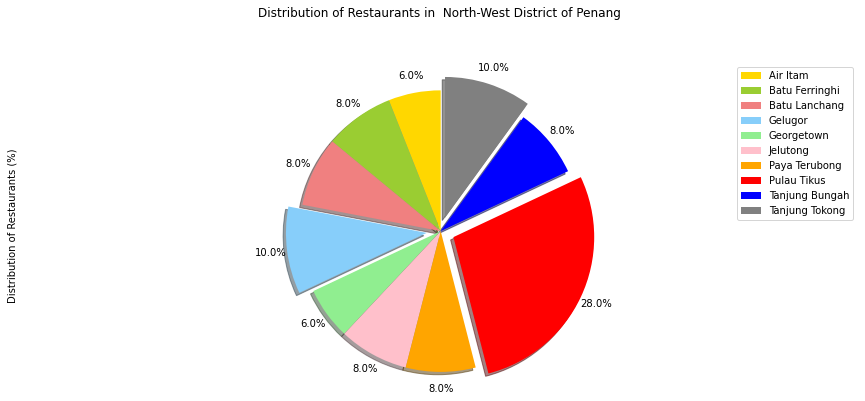

In [201]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_penang.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey'],
                         explode = [0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.1],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddp['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in  North-West District of Penang', y=1.12) 
plt.axis('equal') 

(-1.1343260824370325,
 1.2024754571026197,
 -1.103096293271735,
 1.1001474425367492)

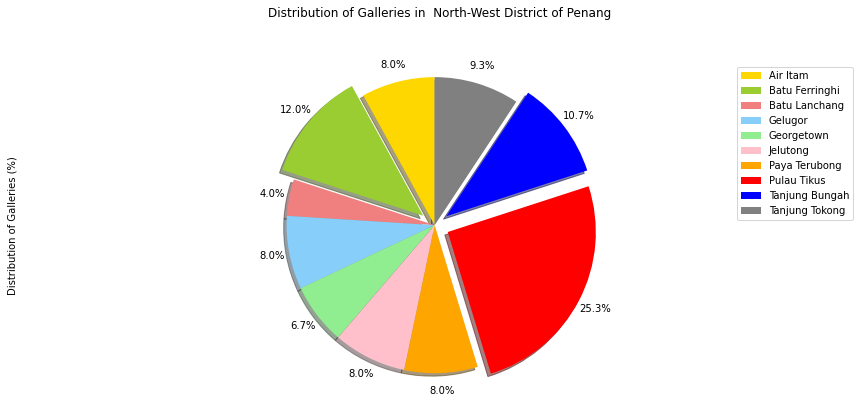

In [203]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_penang.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey'],
                         explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddp['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in  North-West District of Penang', y=1.12) 
plt.axis('equal') 

(-1.183987710417532,
 1.2062312747100794,
 -1.1508483449576439,
 1.2000668796872924)

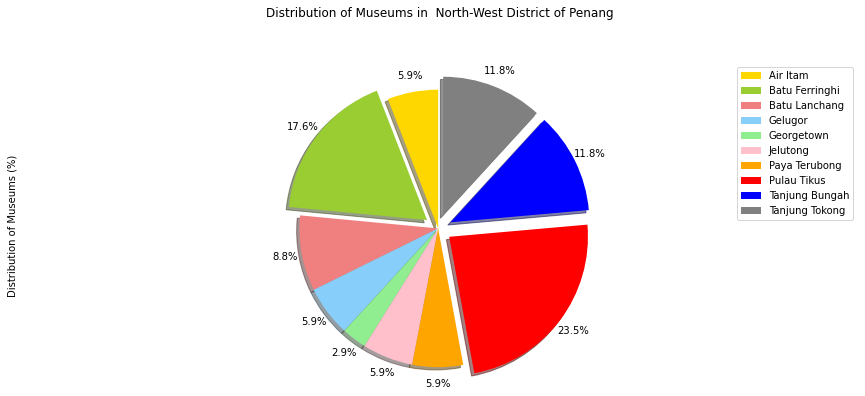

In [205]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_penang.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey'],
                         explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddp['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in  North-West District of Penang', y=1.12) 
plt.axis('equal') 